# Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout

# Load the dataset of Mnist

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train) , (x_test , y_test) = mnist.load_data()

In [3]:
# 60000 - no of samples , shape of image - 28x28(height, width)
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train[0]

5

# Visualization

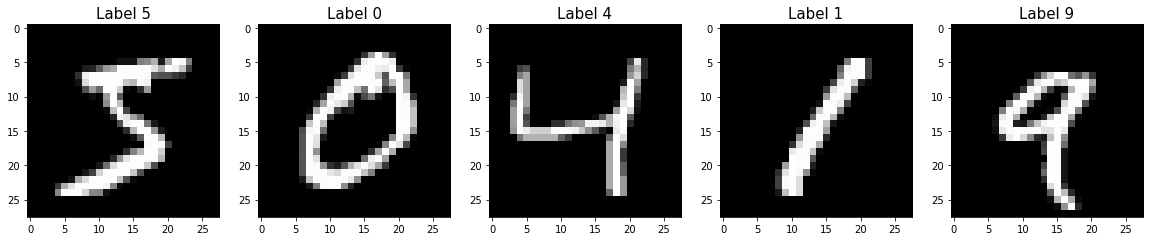

In [6]:
plt.figure(figsize=(20,4))
## zip is to form pair of image data & labels 
# enumerate = will output as index values (0,1,2..)
for index, (image,label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.title("Label %i" %label, fontsize = 15)

# Image Normalization

In [7]:
x_train, y_test = x_train /255.0 , y_test/225.0

# CNN - Convolutional Neural Network

In [8]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation = "relu"),
    Dropout(0.20),
    Dense(10)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="adam", 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [11]:
history = model.fit(x_train,y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2920 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1418 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1051 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0866 - accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0750 - accuracy: 0.9773


In [12]:
# Prediction for Train Data
predicted_val = model.predict(x_train)
predicted_val

array([[-13.372004  ,  -4.7088947 ,  -5.3337975 , ..., -11.591861  ,
        -11.157845  ,  -5.511487  ],
       [ 13.80628   , -11.522913  ,   0.6817101 , ...,  -4.4036136 ,
         -3.271313  ,  -1.1373432 ],
       [ -6.252595  ,  -3.5901146 ,   0.749494  , ...,  -0.9013281 ,
         -4.2025514 ,  -1.8355685 ],
       ...,
       [-12.169149  ,  -8.24862   , -11.890437  , ..., -12.062795  ,
         -0.92023087,   2.0466611 ],
       [ -2.1666687 ,  -6.778343  ,  -2.3857555 , ...,  -2.7604508 ,
         -2.7068248 ,  -6.564026  ],
       [  0.2838964 ,  -7.6141167 ,  -2.9381928 , ...,  -4.105237  ,
          7.7652135 ,  -1.156929  ]], dtype=float32)

In [13]:
# Prediction for Test Data
predicted_val_test = model.predict(x_test)
predicted_val_test

array([[-1431.2242 , -1018.053  ,  -505.92938, ...,  2241.8667 ,
         -249.41182,  -115.04551],
       [-1118.7543 ,  1176.3027 ,  2742.708  , ..., -4136.206  ,
         -417.97137, -3044.464  ],
       [-1400.407  ,  1657.9438 ,  -965.95337, ...,  -381.19336,
         -171.49164, -1555.5052 ],
       ...,
       [-2648.232  , -1986.5575 , -3943.0017 , ...,  -392.31607,
          -53.68054,   507.36377],
       [-1763.1908 , -2726.183  , -2931.6343 , ..., -2316.043  ,
         1361.8347 , -3155.2102 ],
       [ -794.25555, -3211.441  ,  -434.26987, ..., -2116.4773 ,
         -547.0525 , -1447.216  ]], dtype=float32)

# Image Classification

In [14]:
import cv2

In [15]:
img = cv2.imread('2.png', 0)

In [16]:
img.shape

(648, 1152)

In [17]:
img = cv2.resize(img, (28, 28))

In [18]:
img = cv2.bitwise_not(img)

In [19]:
image_data = img.reshape(1, 28 , 28, 1)

In [20]:
np.argmax(model.predict(image_data)) 

4

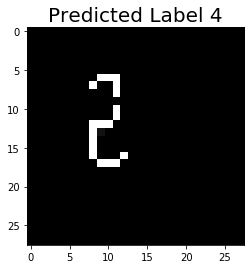

In [21]:
plt.imshow(np.reshape(image_data, (28,28)), cmap='gray')
plt.title("Predicted Label %i" %np.argmax(model.predict(image_data)), fontsize = 20)
plt.show() 